## **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_info_columns', 200)

## **Combine all Data**

In [5]:
ROOT_NPY = "/content/drive/MyDrive/Semester 3/DL/Deep Learning Project/symile/data_npy"
ROOT_CSV = "/content/drive/MyDrive/Semester 3/DL/Deep Learning Project/symile"

def make_split_df(cxr_path):
    cxr = np.load(cxr_path, mmap_mode="r")
    return pd.DataFrame({"image": list(cxr)})

# Load CSV metadata for each split
train_meta = pd.read_csv(f"{ROOT_CSV}/train.csv")
val_meta   = pd.read_csv(f"{ROOT_CSV}/val.csv")
test_meta  = pd.read_csv(f"{ROOT_CSV}/test.csv")
valr_meta  = pd.read_csv(f"{ROOT_CSV}/val_retrieval.csv")

# CXR arrays (memory-mapped)
train_cxr = make_split_df(f"{ROOT_NPY}/train/cxr_train.npy")
val_cxr   = make_split_df(f"{ROOT_NPY}/val/cxr_val.npy")
test_cxr  = make_split_df(f"{ROOT_NPY}/test/cxr_test.npy")
valr_cxr  = make_split_df(f"{ROOT_NPY}/val_retrieval/cxr_val_retrieval.npy")

# Ensure row alignment matches
assert len(train_meta) == len(train_cxr), "Row mismatch in train"
assert len(val_meta)   == len(val_cxr),   "Row mismatch in val"
assert len(test_meta)  == len(test_cxr),  "Row mismatch in test"
assert len(valr_meta)  == len(valr_cxr),  "Row mismatch in test"

# 4. Combine by row order
train_full = pd.concat([train_meta.reset_index(drop=True),
                        train_cxr.reset_index(drop=True)], axis=1)

val_full   = pd.concat([val_meta.reset_index(drop=True),
                        val_cxr.reset_index(drop=True)], axis=1)

test_full  = pd.concat([test_meta.reset_index(drop=True),
                        test_cxr.reset_index(drop=True)], axis=1)

valr_full  = pd.concat([valr_meta.reset_index(drop=True),
                        valr_cxr.reset_index(drop=True)], axis=1)

In [6]:
print(train_full.shape, val_full.shape, test_full.shape, valr_full.shape)

(10000, 111) (750, 113) (4640, 113) (7500, 113)


In [9]:
all_df = pd.concat([train_full, val_full, test_full, valr_full], ignore_index=True)

In [10]:
ROOT = "/content/drive/MyDrive/Semester 3/DL/Deep Learning Project/symile"
df1 = pd.read_csv(f"{ROOT}/symile_mimic_data.csv")

In [11]:
metadf = pd.read_csv("/content/drive/MyDrive/Semester 3/DL/Deep Learning Project/mimic-cxr-2.0.0-metadata.csv.gz")

In [12]:
df1 = df1.merge(
    metadf[['dicom_id', 'ViewPosition']],
    left_on='cxr_dicom_id',
    right_on='dicom_id',
    how='left'
)

## **Standardize Column Names**

In [13]:
LABS = {
    "51221": "Hematocrit",
    "51265": "Platelet Count",
    "50912": "Creatinine",
    "50971": "Potassium",
    "51222": "Hemoglobin",
    "51301": "White Blood Cells",
    "51249": "MCHC",
    "51279": "Red Blood Cells",
    "51250": "MCV",
    "51248": "MCH",
    "51277": "RDW",
    "51006": "Urea Nitrogen",
    "50983": "Sodium",
    "50902": "Chloride",
    "50882": "Bicarbonate",
    "50868": "Anion Gap",
    "50931": "Glucose",
    "50960": "Magnesium",
    "50893": "Calcium, Total",
    "50970": "Phosphate",
    "51237": "INR(PT)",
    "51274": "PT",
    "51275": "PTT",
    "51146": "Basophils",
    "51256": "Neutrophils",
    "51254": "Monocytes",
    "51200": "Eosinophils",
    "51244": "Lymphocytes",
    "52172": "RDW-SD",
    "50934": "H",
    "51678": "L",
    "50947": "I",
    "50861": "Alanine Aminotransferase (ALT)",
    "50878": "Asparate Aminotransferase (AST)",
    "50813": "Lactate",
    "50863": "Alkaline Phosphatase",
    "50885": "Bilirubin, Total",
    "50820": "pH",
    "50862": "Albumin",
    "50802": "Base Excess",
    "50821": "pO2",
    "50804": "Calculated Total CO2",
    "50818": "pCO2",
    "52075": "Absolute Neutrophil Count",
    "52073": "Absolute Eosinophil Count",
    "52074": "Absolute Monocyte Count",
    "52069": "Absolute Basophil Count",
    "51133": "Absolute Lymphocyte Count",
    "50910": "Creatine Kinase (CK)",
    "52135": "Immature Granulocytes"
}

# Raw labs
raw_lab_rename = {lab_id: LABS[lab_id] for lab_id in LABS}

# Percentile labs
percentile_lab_rename = {f"{lab_id}_percentile": f"{LABS[lab_id]}_percentile"
                         for lab_id in LABS}


df_all = all_df.rename(columns={**raw_lab_rename, **percentile_lab_rename})
df1 = df1.rename(columns=raw_lab_rename)

cols_to_keep = [
    "hadm_id", "subject_id", "admission_type", "admission_location",
    'Consolidation', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
    'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices',
    "discharge_location", "race", "gender", "age",
    "hospital_expire_flag", "ViewPosition", "dicom_id"
]

df_full_small = df1[cols_to_keep]
df_all = df_all.merge(df_full_small, on="hadm_id", how="left")
print("ALL DF SHAPE:", df_all.shape)

ALL DF SHAPE: (22890, 131)


In [14]:
df_all['Pneumonia'].value_counts()

,count
Pneumonia,
0.0,2723
1.0,2461
-1.0,1989


In [28]:
df_all.shape

(22890, 131)

### **Distribution of Pneumonia in the Raw Data**

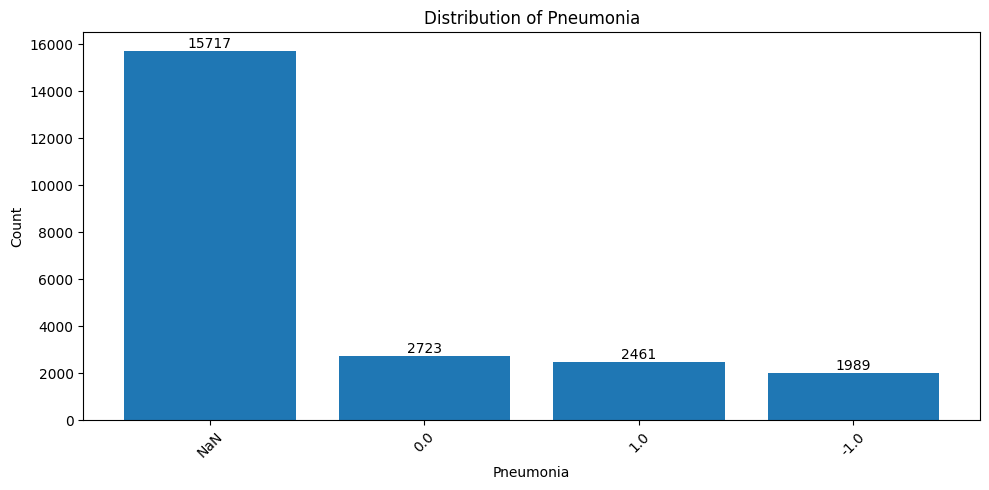

In [33]:
def plot_column_distribution(df, column):
    counts = df[column].value_counts(dropna=False)
    labels = counts.index.to_series().astype(str).replace("nan", "NaN")
    plt.figure(figsize=(10, 5))
    bars = plt.bar(labels, counts)
    for bar, value in zip(bars, counts):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            str(value),
            ha='center',
            va='bottom'
        )

    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_column_distribution(df_all, "Pneumonia")

In [15]:
fdf = df_all.copy()

In [16]:
fdf["Pneumonia"] = fdf["Pneumonia"].replace(-1, np.nan)
fdf = fdf.dropna(subset=["Pneumonia"])
fdf["Pneumonia"] = fdf["Pneumonia"].astype(int)
fdf["Pneumonia"] = fdf["Pneumonia"].astype(int)
print(fdf["Pneumonia"].value_counts())

Pneumonia
0    2723
1    2461
Name: count, dtype: int64


In [17]:
fdf.shape

(5184, 131)

In [18]:
fdf.duplicated(subset=["subject_id_x", "hadm_id"]).sum()

np.int64(2706)

In [19]:
fdf['ViewPosition'].value_counts()

,count
ViewPosition,
AP,4091
PA,1093


In [ ]:
def pick_row(group):
    ap_rows = group[group["ViewPosition"] == "AP"]
    if len(ap_rows) > 0:
        return ap_rows.iloc[[0]]
    else:
        return group.iloc[[0]]

adf = fdf.groupby(["subject_id_x", "hadm_id"], group_keys=False).apply(pick_row)

In [21]:
adf['ViewPosition'].value_counts()

,count
ViewPosition,
AP,1974
PA,504


### **Save**

In [22]:
#adf.to_pickle("/content/drive/MyDrive/Semester 3/DL/Shiv/final_df.pkl")

### **Reload**

In [2]:
df = pd.read_pickle("/content/drive/MyDrive/Semester 3/DL/Shiv/final_df.pkl")

In [24]:
df.head()

,subject_id_x,hadm_id,cxr_path,Atelectasis,Cardiomegaly,Edema,Lung Opacity,No Finding,Pleural Effusion,ecg_path,Hematocrit,Platelet Count,Creatinine,Potassium,Hemoglobin,White Blood Cells,MCHC,Red Blood Cells,MCV,MCH,RDW,Urea Nitrogen,Sodium,Chloride,Bicarbonate,Anion Gap,Glucose,Magnesium,"Calcium, Total",Phosphate,INR(PT),PT,PTT,Basophils,Neutrophils,Monocytes,Eosinophils,Lymphocytes,RDW-SD,H,L,I,Alanine Aminotransferase (ALT),Asparate Aminotransferase (AST),Lactate,Alkaline Phosphatase,"Bilirubin, Total",pH,Albumin,Base Excess,pO2,Calculated Total CO2,pCO2,Absolute Neutrophil Count,Absolute Eosinophil Count,Absolute Monocyte Count,Absolute Basophil Count,Absolute Lymphocyte Count,Creatine Kinase (CK),Immature Granulocytes,Hematocrit_percentile,Platelet Count_percentile,Creatinine_percentile,Potassium_percentile,Hemoglobin_percentile,White Blood Cells_percentile,MCHC_percentile,Red Blood Cells_percentile,MCV_percentile,MCH_percentile,RDW_percentile,Urea Nitrogen_percentile,Sodium_percentile,Chloride_percentile,Bicarbonate_percentile,Anion Gap_percentile,Glucose_percentile,Magnesium_percentile,"Calcium, Total_percentile",Phosphate_percentile,INR(PT)_percentile,PT_percentile,PTT_percentile,Basophils_percentile,Neutrophils_percentile,Monocytes_percentile,Eosinophils_percentile,Lymphocytes_percentile,RDW-SD_percentile,H_percentile,L_percentile,I_percentile,Alanine Aminotransferase (ALT)_percentile,Asparate Aminotransferase (AST)_percentile,Lactate_percentile,Alkaline Phosphatase_percentile,"Bilirubin, Total_percentile",pH_percentile,Albumin_percentile,Base Excess_percentile,pO2_percentile,Calculated Total CO2_percentile,pCO2_percentile,Absolute Neutrophil Count_percentile,Absolute Eosinophil Count_percentile,Absolute Monocyte Count_percentile,Absolute Basophil Count_percentile,Absolute Lymphocyte Count_percentile,Creatine Kinase (CK)_percentile,Immature Granulocytes_percentile,image,label_hadm_id,label,subject_id_y,admission_type,admission_location,Consolidation,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,discharge_location,race,gender,age,hospital_expire_flag,ViewPosition,dicom_id
2033,10002428,28662225,files/p10/p10002428/s55758034/3bea0373-0d10dd7...,NaN,NaN,NaN,NaN,NaN,1.0,files/p1000/p10002428/s42754780/42754780,36.1,353.0,1.1,4.3,11.6,20.2,32.3,3.76,96.0,30.9,12.8,15.0,127.0,89.0,25.0,17.0,121.0,1.4,7.4,2.2,1.4,15.0,26.9,0.2,93.6,2.4,0.1,3.6,NaN,NaN,NaN,NaN,26.0,30.0,2.2,78.0,0.5,NaN,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.520802,0.874523,0.563640,0.573538,0.509038,0.923880,0.447268,0.429490,0.754419,0.653375,0.109281,0.270530,0.040350,0.040972,0.626056,0.643727,0.473338,0.067158,0.071252,0.070832,0.728236,0.691659,0.176887,0.410972,0.973753,0.094467,0.233389,0.077323,NaN,NaN,NaN,NaN,0.548011,0.454772,0.659547,0.404005,0.506702,NaN,0.817691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[[[-1.8781574, -1.8781574, -1.9124069, -1.9124...",NaN,NaN,10002428,EW EMER.,EMERGENCY ROOM,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,SKILLED NURSING FACILITY,WHITE,F,81,0,AP,3bea0373-0d10dd77-1cac5b90-651be924-d343b184
4716,10012768,26708632,files/p10/p10012768/s55247703/5630ebbd-7e38ba8...,-1.0,NaN,0.0,1.0,NaN,NaN,files/p1001/p10012768/s42190774/42190774,35.5,176.0,0.8,4.1,12.0,3.7,33.8,3.72,95.0,32.3,15.5,17.0,139.0,101.0,28.0,14.0,76.0,2.3,9.2,4.1,NaN,NaN,NaN,1.1,67.9,10.4,3.6,16.7,54.6,NaN,NaN,NaN,14.0,16.0,NaN,47.0,0.3,NaN,4.1,NaN,NaN,NaN,NaN,2.48,0.13,0.38,0.04,0.61,NaN,0.3,0.489524,0.319012,0.300661,0.450070,0.570094,0.038763,0.797911,0.413118,0.711029,0.840398,0.675974,0.353755,0.656369,0.512553,0.850402,0.309588,0.033593,0.882858,0.767560,0.724791,NaN,NaN,NaN,0.971270,0.231733,0.904824,0.914282,0.665760,0.761134,NaN,NaN,NaN,0.204527,0.091620,NaN,0.067474,0.263237,NaN,0.817691,NaN,NaN,NaN,NaN,0.048988,0.717584,0.163766,0.691297,0.198224,NaN,0.19906,"[[[-2.0665298, -2.0665298, -2.0665298, -2.0665...",NaN,NaN,10012768,ELECTIVE,PHYSICIAN REFERRAL,0.0,-1.0,1.0,NaN,NaN,0,NaN,1.0,HOME,

In [26]:
df.describe()

,subject_id_x,hadm_id,Atelectasis,Cardiomegaly,Edema,Lung Opacity,No Finding,Pleural Effusion,Hematocrit,Platelet Count,Creatinine,Potassium,Hemoglobin,White Blood Cells,MCHC,Red Blood Cells,MCV,MCH,RDW,Urea Nitrogen,Sodium,Chloride,Bicarbonate,Anion Gap,Glucose,Magnesium,"Calcium, Total",Phosphate,INR(PT),PT,PTT,Basophils,Neutrophils,Monocytes,Eosinophils,Lymphocytes,RDW-SD,H,L,I,Alanine Aminotransferase (ALT),Asparate Aminotransferase (AST),Lactate,Alkaline Phosphatase,"Bilirubin, Total",pH,Albumin,Base Excess,pO2,Calculated Total CO2,pCO2,Absolute Neutrophil Count,Absolute Eosinophil Count,Absolute Monocyte Count,Absolute Basophil Count,Absolute Lymphocyte Count,Creatine Kinase (CK),Immature Granulocytes,Hematocrit_percentile,Platelet Count_percentile,Creatinine_percentile,Potassium_percentile,Hemoglobin_percentile,White Blood Cells_percentile,MCHC_percentile,Red Blood Cells_percentile,MCV_percentile,MCH_percentile,RDW_percentile,Urea Nitrogen_percentile,Sodium_percentile,Chloride_percentile,Bicarbonate_percentile,Anion Gap_percentile,Glucose_percentile,Magnesium_percentile,"Calcium, Total_percentile",Phosphate_percentile,INR(PT)_percentile,PT_percentile,PTT_percentile,Basophils_percentile,Neutrophils_percentile,Monocytes_percentile,Eosinophils_percentile,Lymphocytes_percentile,RDW-SD_percentile,H_percentile,L_percentile,I_percentile,Alanine Aminotransferase (ALT)_percentile,Asparate Aminotransferase (AST)_percentile,Lactate_percentile,Alkaline Phosphatase_percentile,"Bilirubin, Total_percentile",pH_percentile,Albumin_percentile,Base Excess_percentile,pO2_percentile,Calculated Total CO2_percentile,pCO2_percentile,Absolute Neutrophil Count_percentile,Absolute Eosinophil Count_percentile,Absolute Monocyte Count_percentile,Absolute Basophil Count_percentile,Absolute Lymphocyte Count_percentile,Creatine Kinase (CK)_percentile,Immature Granulocytes_percentile,label_hadm_id,label,subject_id_y,Consolidation,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,age,hospital_expire_flag
count,2.478000e+03,2.478000e+03,841.000000,1409.000000,1529.000000,977.000000,277.0,1513.000000,2474.000000,2469.000000,2474.000000,2467.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2473.000000,2467.000000,2468.000000,2465.000000,2464.000000,2460.000000,2272.000000,2246.000000,2244.000000,2096.000000,2096.000000,2064.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,824.000000,240.000000,240.000000,240.000000,1477.000000,1478.000000,1664.000000,1457.000000,1464.000000,1005.000000,1278.000000,966.000000,965.000000,965.000000,965.000000,724.000000,723.000000,723.000000,723.000000,723.000000,814.000000,602.000000,2474.000000,2469.000000,2474.000000,2467.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2473.000000,2467.000000,2468.000000,2465.000000,2464.000000,2460.000000,2272.000000,2246.000000,2244.000000,2096.000000,2096.000000,2064.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,824.000000,240.000000,240.000000,240.000000,1477.000000,1478.000000,1664.000000,1457.000000,1464.000000,1005.000000,1278.000000,966.000000,965.000000,965.000000,965.000000,724.000000,723.000000,723.000000,723.000000,723.000000,814.000000,602.000000,2.840000e+02,284.0,2.478000e+03,377.000000,287.000000,49.000000,83.000000,42.000000,2478.000000,605.000000,790.000000,2478.000000,2478.000000
mean,1.504813e+07,2.502244e+07,0.593341,0.662172,0.159581,0.833163,1.0,0.409121,35.830922,231.719725,1.578860,4.361167,11.699595,11.539013,32.602671,3.928236,91.786119,29.917523,14.982315,27.837444,137.197406,100.797002,24.088844,16.724432,147.731707,1.940185,8.725512,3.653654,1.531646,16.604389,35.248062,0.395271,75.405888,6.246500,1.339638,15.202828,49.980825,64.895833,13.891667,1.216667,68.013541,101.337618,2.341977,117.027454,1.152049,7.348458,3.573005,-1.309524,126.749223,25.602073,45.406218,8.695967,0.107427,0.812642,

## **Exploratory Data Analysis**

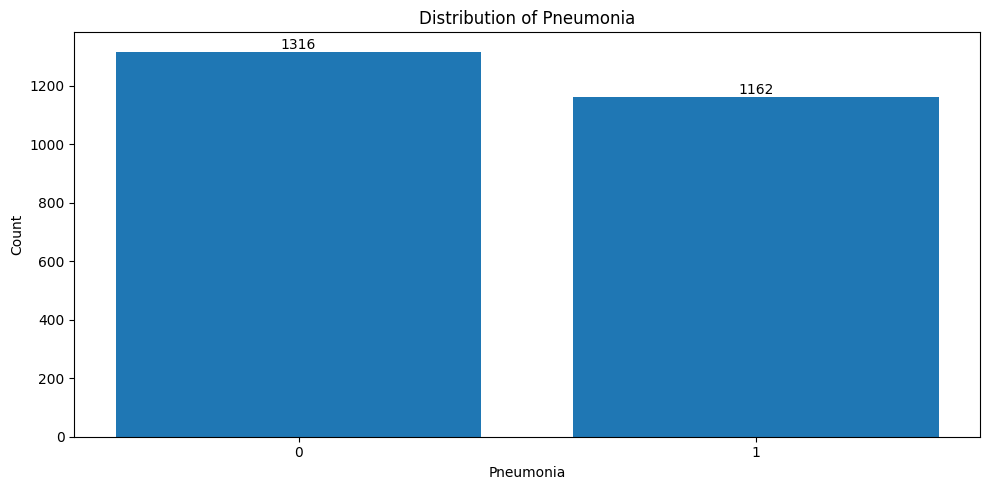

In [35]:
def plot_column_distribution(df, column):
    counts = df[column].value_counts(dropna=False)
    labels = counts.index.to_series().astype(str).replace("nan", "NaN")

    plt.figure(figsize=(10, 5))
    bars = plt.bar(labels, counts)

    for bar, value in zip(bars, counts):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            str(value),
            ha='center',
            va='bottom'
        )

    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_column_distribution(df, "Pneumonia")

In [42]:

sns.set(style="whitegrid")

def plot_age_kde(df, column="age"):
    plt.figure(figsize=(10, 5))

    sns.kdeplot(data=df, x=column, fill=True)

    plt.title("KDE Plot of Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


def plot_bar_distribution(df, column, title=None):
    counts = df[column].value_counts(dropna=False)

    labels = counts.index.to_series().astype(str).replace("nan", "NaN")

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, counts)

    for bar, value in zip(bars, counts):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(value),
            ha='center', va='bottom'
        )

    plt.title(title or f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


def plot_sex_distribution(df):
    plot_bar_distribution(df, "gender", "Sex Distribution")




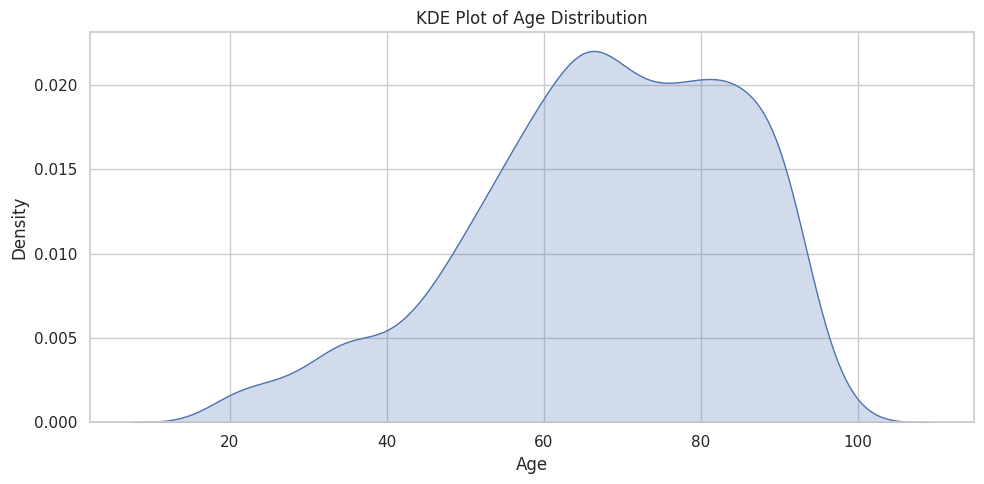

In [37]:
plot_age_kde(df)


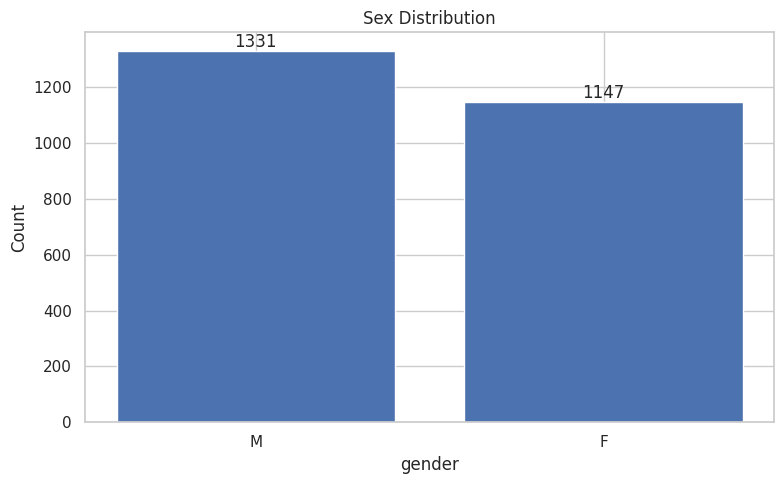

In [40]:
plot_sex_distribution(df)


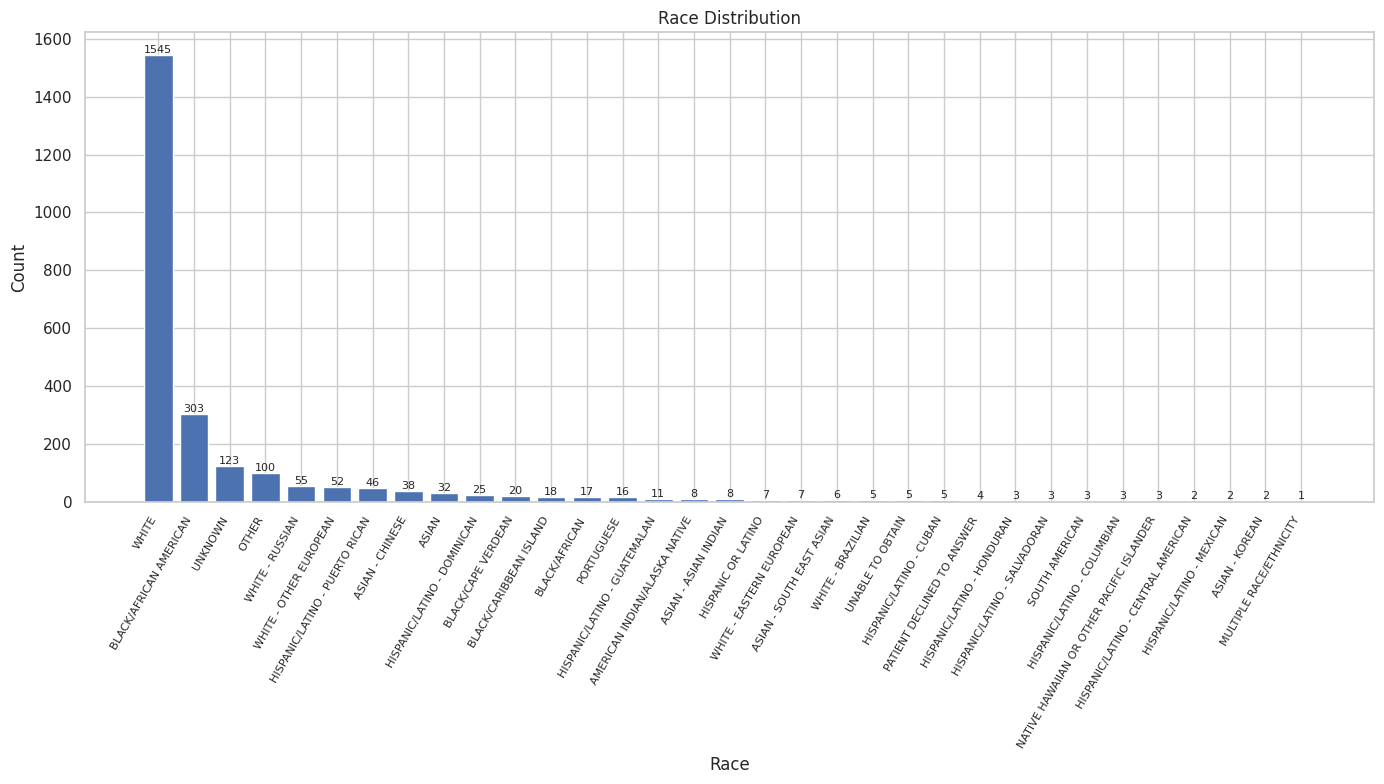

In [48]:
def plot_race_distribution(df, column="race"):
    counts = df[column].value_counts(dropna=False)
    labels = counts.index.to_series().astype(str).replace("nan", "NaN")

    plt.figure(figsize=(14, 8))
    bars = plt.bar(labels, counts)

    for bar, value in zip(bars, counts):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(value),
            ha='center', va='bottom',
            fontsize=8
        )

    plt.title("Race Distribution")
    plt.xlabel("Race")
    plt.ylabel("Count")
    plt.xticks(rotation=60, ha='right', fontsize=8)
    plt.tight_layout()
    plt.show()
plot_race_distribution(df)

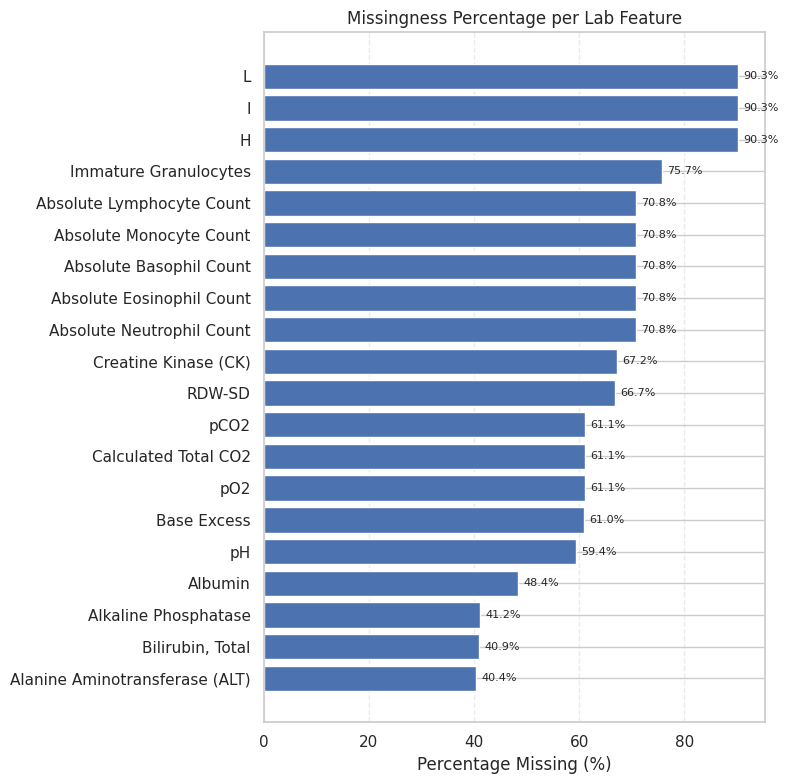

In [56]:
def plot_missingness_clean(df, lab_names, min_pct=5, top_n=None):

    existing_cols = [c for c in lab_names if c in df.columns]
    missing_pct = df[existing_cols].isnull().mean() * 100
    missing_pct = missing_pct[missing_pct >= min_pct]
    missing_pct = missing_pct.sort_values(ascending=True)
    if top_n is not None:
        missing_pct = missing_pct.tail(top_n)

    if missing_pct.empty:
        print("No labs meet the missingness threshold.")
        return

    height = max(4, 0.35 * len(missing_pct) + 1)
    fig, ax = plt.subplots(figsize=(8, height))

    bars = ax.barh(missing_pct.index, missing_pct.values)
    for bar, value in zip(bars, missing_pct.values):
        ax.text(value + 1,
                bar.get_y() + bar.get_height() / 2,
                f"{value:.1f}%",
                va='center',
                fontsize=8)

    ax.set_xlabel("Percentage Missing (%)")
    ax.set_title("Missingness Percentage per Lab Feature")
    ax.grid(axis='x', linestyle='--', alpha=0.4)
    ax.set_axisbelow(True)

    ax.set_xlim(0, min(100, np.nanmax(missing_pct.values) + 5))

    plt.tight_layout()
    plt.show()


plot_missingness_clean(df, LABS, min_pct=5, top_n=20)

any_other_condition  False  True 
Pneumonia                        
0                      367    949
1                      142   1020
any_other_condition  False  True 
Pneumonia                        
0                     27.9   72.1
1                     12.2   87.8


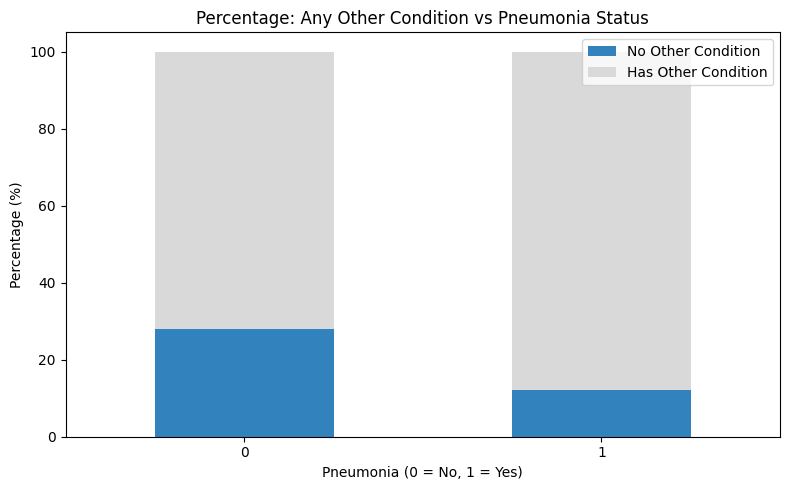

In [3]:
conditions = [
    'Atelectasis', 'Cardiomegaly', 'Edema', 'Lung Opacity',
    'Pleural Effusion', 'Enlarged Cardiomediastinum', 'Fracture',
    'Lung Lesion', 'Pleural Other', 'Pneumonia', 'Pneumothorax'
]

pneumonia_col = 'Pneumonia'
other_conditions = [c for c in conditions if c != pneumonia_col]
df_pneu = df[df[pneumonia_col].isin([0, 1])].copy()
df_pneu[conditions] = df_pneu[conditions].replace(-1, pd.NA)
df_pneu["any_other_condition"] = (df_pneu[other_conditions] == 1).any(axis=1)

summary_counts = pd.crosstab(
    df_pneu[pneumonia_col],
    df_pneu["any_other_condition"]
)

summary_pct = pd.crosstab(
    df_pneu[pneumonia_col],
    df_pneu["any_other_condition"],
    normalize="index"
) * 100

print(summary_counts)
print(summary_pct.round(1))

summary_pct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='tab20c')
plt.title("Percentage: Any Other Condition vs Pneumonia Status")
plt.xlabel("Pneumonia (0 = No, 1 = Yes)")
plt.ylabel("Percentage (%)")
plt.legend(["No Other Condition", "Has Other Condition"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




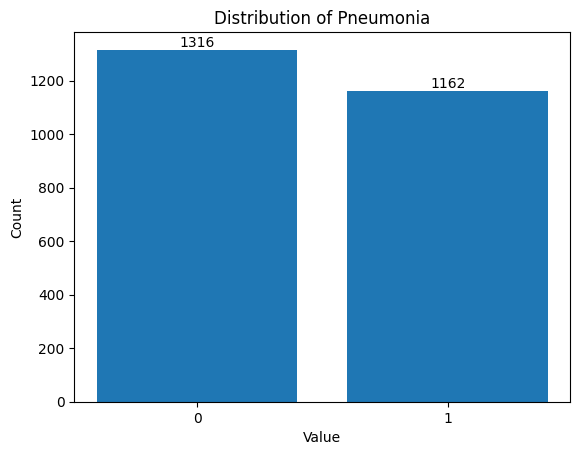

In [27]:
counts = df["Pneumonia"].value_counts().sort_index()

plt.bar([0,1], counts.values)
plt.xticks([0,1])
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Distribution of Pneumonia")

for x, val in zip([0,1], counts.values):
    plt.text(x, val + 10, str(val), ha='center')

plt.show()